In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#для рисования дерева
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

from sklearn.datasets import load_boston

In [55]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

In [56]:
data.head(5)

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [57]:
X = data[data.columns[:-1]]
y = data[data.columns[-1]]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

Попробуем использовать модель линейной регресси. Коэффицтент детерминации (R2) достаточно низкий 0.67.

In [59]:
lr =  LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.673382550640018

In [60]:
lr.coef_

array([-1.21310401e-01,  4.44664254e-02,  1.13416945e-02,  2.51124642e+00,
       -1.62312529e+01,  3.85906801e+00, -9.98516565e-03, -1.50026956e+00,
        2.42143466e-01, -1.10716124e-02, -1.01775264e+00,  6.81446545e-03,
       -4.86738066e-01])

In [61]:
lr.intercept_

37.93710774183316

Попробуем применить метод SVM для регрессии. Резуьтат хуже даже чем для линейной регрессии 0.622

In [62]:
ss_scaler = preprocessing.StandardScaler()
Xss = ss_scaler.fit_transform(X)
X_tr_ss, X_t_ss, y_tr_ss, y_t_ss = train_test_split(Xss, y, test_size=0.3, random_state=0)

In [80]:
svr = SVR(kernel = "linear", C=1.0, epsilon=0.2)
svr.fit(X_tr_ss, y_tr_ss)
svr.score(X_t_ss, y_t_ss)
#svr.fit(X_train, y_train)
#svr.score(X_test, y_test)

0.6228894331595806

Попробуем использовать регрессию метода случайного леса. Коэффициент детерминации 0.96 - очень хороший результат.

In [64]:
rfr = RandomForestRegressor(random_state=0)
rfr.fit(X, y)
rfr.score(X_test, y_test)

C:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9686192698629197

Оценим важность признаков. Самые влияющие оказались RM и LSTAT.

([<matplotlib.axis.YTick at 0x2358a8e6b08>,
 <a list of 13 Text yticklabel objects>)

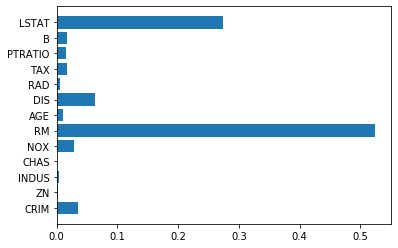

In [65]:
rfr.feature_importances_
plt.barh(np.arange(len(rfr.feature_importances_)), rfr.feature_importances_)
plt.yticks(np.arange(len(X.columns)),X.columns)

In [66]:
dot_data = StringIO()
fig = plt.figure(figsize = (12,12))
export_graphviz(rfr.estimators_[0], out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<Figure size 864x864 with 0 Axes>

In [67]:
rfr.estimators_

[DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=209652396, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=398764591, splitter='best'),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, 

In [68]:
def get_tree_dot_view(regr, feature_names=None, class_names=None):
    print(export_graphviz(regr.estimators_[0], out_file=None, filled=True, feature_names=feature_names, class_names=class_names))
    
#get_tree_dot_view(rfr, list(X.columns), y)